In [61]:
import pandas as pd
import seaborn as sns
from matplotlib import colormaps
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('seattle-weather.csv')

In [13]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [14]:
data = data.drop('date',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [15]:
X,y = data.drop('weather',axis=1), data['weather']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=0.5, shuffle=False)

In [16]:
# model = DecisionTreeRegressor(random_state=42)
# model.fit(X_train, y_train)
# print(y_train.dtypes)

In [17]:
model = DecisionTreeClassifier(random_state=42,max_depth=5,min_samples_split=10,min_samples_leaf=5)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [18]:
prediction_y = model.predict(X_test)
accuracy = (prediction_y == y_test).mean()
print(f'Accuracy: {accuracy}')

Accuracy: 0.8727770177838577


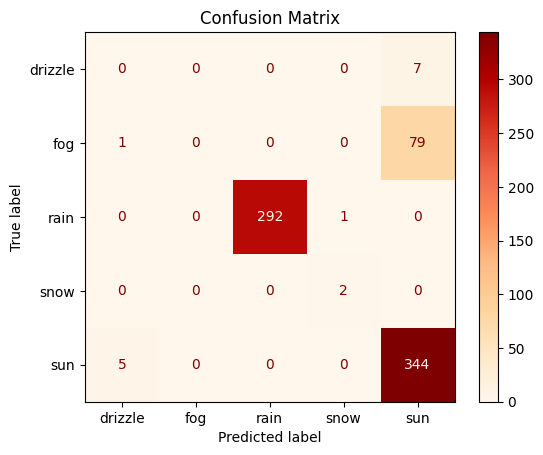

In [62]:
cm = confusion_matrix(y_test, prediction_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="OrRd")
plt.title("Confusion Matrix")
plt.show()

In [64]:
data['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64